<h1><center>DS200 - PE4: K-Means Clustering Exercises</center></h1>

## Introduction

In this exercise, you will be using the K-Means Clustering algorithm to cluster Universities into to two groups, namely, Private and Public.

----
**IMPORTANT NOTE: 
We actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm in the real applications, you don't have labels. In this exercise, we will use the labels to try to get an idea of how well our trained model performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix by the end of this project, don't actually make sense in a real world setting! You will learn the "correct" ways of model evaluation for clustering in DS 300.

## The Data

We will use a data frame with 777 observations on the following 18 variables -- 17 potential features and 1 label (only used for evaluation).
* **Private:** A factor with levels No and Yes indicating private or public university
* **Apps:** Number of applications received
* **Accept:** Number of applications accepted
* **Enroll:** Number of new students enrolled
* **Top10perc:** Pct. new students from top 10% of H.S. class
* **Top25perc:** Pct. new students from top 25% of H.S. class
* **F.Undergrad:** Number of fulltime undergraduates
* **P.Undergrad:** Number of parttime undergraduates
* **Outstate:** Out-of-state tuition
* **Room.Board:** Room and board costs
* **Books:** Estimated book costs
* **Personal:** Estimated personal spending
* **PhD:** Pct. of faculty with Ph.D.’s
* **Terminal:** Pct. of faculty with terminal degree
* **S.F.Ratio:** Student/faculty ratio
* **perc.alumni:** Pct. alumni who donate
* **Expend:** Instructional expenditure per student
* **Grad.Rate:** Graduation rate

## Section 1: Import Libraries and Load the Data

Import the necessary libraries.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the College_Data file using the given URL. 

We need to use the college names as the indices to the DataFrame, and be sure to exclude the first row of the dataset, as it is empty.

*Hint: use the `index_col` and `skiprows` arguments accordingly.*

In [56]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/College_Data.csv'

In [57]:
df = pd.read_csv(url, index_col= 0, skiprows=1)



Check the head of the data

In [58]:
df.head()



Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

Check the columns and DF size.

In [59]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

See the mean and standard deviation for all numeric columns.

In [60]:
df.describe()



Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

## Section 2: EDA

It's time to create some exploratory data analysis!

Check to see if the labels are balanced.

<AxesSubplot:xlabel='Private', ylabel='count'>

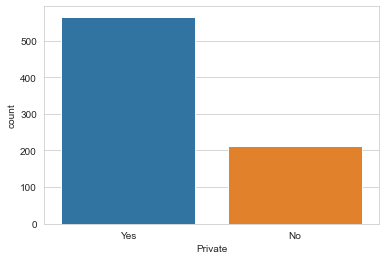

In [61]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='Private')





Create a scatter plot of `Grad.Rate` versus `Room.Board` as shown, where the points are colored by the Private column.

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

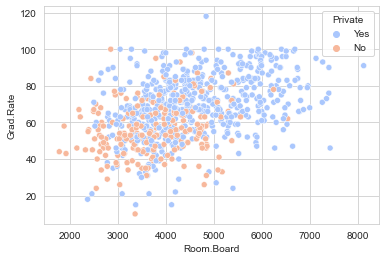

In [62]:
sns.scatterplot(data=df, x='Room.Board', y='Grad.Rate', hue='Private', palette='coolwarm')




Create a scatter plot of `F.Undergrad` versus `Outstate` as shown, where the points are colored by the `Private` column.

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

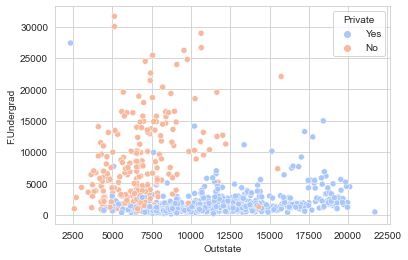

In [63]:
sns.scatterplot(data=df, x='Outstate', y='F.Undergrad', hue='Private', palette='coolwarm')



Create a histogram of State Tuition and color-code the difference between `Private` vs. `Public`.

<AxesSubplot:xlabel='Outstate', ylabel='Count'>

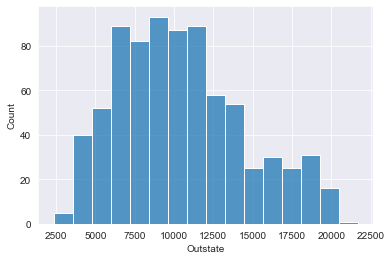

In [64]:
sns.set_style('darkgrid')
sns.histplot(data=df['Outstate'])




Create a similar histogram for the `Grad.Rate` column.

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

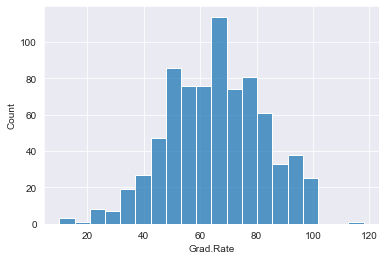

In [65]:
sns.histplot(data=df['Grad.Rate'])



Notice on the higher-end of the histogram that there seems to be a private school with a graduation rate higher than 100%. Try to pinpoint what is the name of that school.

In [66]:
df[df['Grad.Rate'] > 100]

Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Cazenovia College     Yes  3847    3433     527          9         35   

                   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
Cazenovia College         1010           12      9384        4840    600   

                   Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  \
Cazenovia College       500   22        47       14.3           20    7697   

                   Grad.Rate  
Cazenovia College        118

Set that school's graduation rate to 100 so it makes sense. 

In [67]:
df.at['Cazenovia College', 'Grad.Rate']=100



Now let's check the `Grad.Rate` column again to see if still there is a school with higher than 100% graduation rate. 

In [68]:
df[df['Grad.Rate'] > 100]



Empty DataFrame
Columns: [Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

## Section 3: K Means Clustering

Now it is time to predict the Cluster labels!

Import the correct model from SciKit Learn.

In [69]:
from sklearn.cluster import KMeans


Create an instance of a K Means model with 2 clusters (why do we have 2 clusters here?).

In [70]:
#only 2 for private and public
kmeans = KMeans(
    n_clusters=2, 
    verbose=3
)




#### Fit the model to all the data except for the label column.

In [71]:
kmeans.fit(df.drop('Private', axis=1))



Initialization complete
Iteration 0, inertia 74515065154.33998
Iteration 1, inertia 56087398076.68437
Iteration 2, inertia 56073217122.16589
Iteration 3, inertia 56062727153.55355
Iteration 4, inertia 56049187895.78091
Iteration 5, inertia 56035579472.521454
Iteration 6, inertia 55987867715.21582
Iteration 7, inertia 55897851872.61315
Iteration 8, inertia 55711473865.28576
Iteration 9, inertia 55429636597.10106
Iteration 10, inertia 55104211990.52132
Iteration 11, inertia 54847165832.506355
Iteration 12, inertia 54447573507.694305
Iteration 13, inertia 54207788937.484436
Iteration 14, inertia 54111721057.64314
Iteration 15, inertia 53998572618.62677
Iteration 16, inertia 53946111720.14196
Iteration 17, inertia 53902218520.165276
Iteration 18, inertia 53692759903.68022
Iteration 19, inertia 53302743024.99495
Iteration 20, inertia 53009513618.74144
Iteration 21, inertia 52714126348.64339
Iteration 22, inertia 52006746961.81219
Iteration 23, inertia 51319898540.372856
Iteration 24, inerti

KMeans(n_clusters=2, verbose=3)

#### What are the cluster center vectors? What is the dimension of the center vectors? 

In [72]:
centers = kmeans.cluster_centers_

centers



array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

#### What are the predicted labels?

In [73]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Section 4: Model Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

#### Create a new column for `df` called 'Cluster', which uses 1 for a Private school, and 0 for a public school. 

*Hint: You want to first create a function or lambda expression to convert 'Yes' or 'No' from the 'Private' column into boolean values. Then apply this function to create the new column 'Cluster'.*

#### Define the transformation function or lambda expression here

In [74]:
def converter(private):
    if private ==  'Yes':
        return 0
    else:
        return 1


    

#### Change the original column to generate the new column.

In [75]:
df['Private'] = df['Private'].apply(converter)



#### Check the top 5 records of the new DataFrame

In [76]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University        0  1660    1232     721         23   
Adelphi University                  0  2186    1924     512         16   
Adrian College                      0  1428    1097     336         22   
Agnes Scott College                 0   417     349     137         60   
Alaska Pacific University           0   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

**Because kmeans knows nothing about the identity of the cluster, the predicted 0,1 labels may be permuted (out-of-order). We can actually fix this by matching each learned cluster label with the true labels found in them**

#### Firstly, create a new numpy array called `labels` that has same size of the `Cluster` column.

In [77]:
labels = np.zeros_like(df['Private'])



#### The `mode()` function from `scipy.stat` finds the value that appears most often in a given set. Understanding the correct label is the one that appears most frequent from the original "true" labels with the predicted clustering, create a for loop to fix the permuted labels.

In [85]:
from scipy.stats import mode

for i in range(2):
    mask = kmeans.labels_ == i
    labels[mask] = mode(df['Private'][mask])[0]   




In [86]:
# Display the fixed labels
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
df['Private'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Now, create a confusion matrix and classification report to find the effectiveness of your model.

What do you find from the confusion matrix, and why?

In [88]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(df['Private'], labels))
print(classification_report(df['Private'], labels))

[[531  34]
 [138  74]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       565
           1       0.69      0.35      0.46       212

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



The model is not too bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!



## Great Job!